<a href="https://colab.research.google.com/github/rubanzasilva/tabularPlaygroundSeptember/blob/test/tabularPlaygroundSeptember.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from fastai.tabular.all import *|

SyntaxError: ignored

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from pathlib import Path

from fastai.tabular.all import *

In [10]:
!ls drive/MyDrive/Rubanza/kaggle/

sample_submission.csv			test.csv
tabular-playground-series-sep-2022.zip	train.csv


In [11]:
path = Path('drive/MyDrive/Rubanza/kaggle/')
path

Path('drive/MyDrive/Rubanza/kaggle')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train_df = pd.read_csv(path/'train.csv') 
test_df = pd.read_csv(path/'test.csv')
sample = pd.read_csv(path/'sample_submission.csv')
train_df.head(100)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
95,95,2017-01-02,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,123
96,96,2017-01-03,Belgium,KaggleMart,Kaggle Advanced Techniques,549
97,97,2017-01-03,Belgium,KaggleMart,Kaggle Getting Started,425
98,98,2017-01-03,Belgium,KaggleMart,Kaggle Recipe Book,334


In [14]:
train_df.head(100)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
95,95,2017-01-02,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,123
96,96,2017-01-03,Belgium,KaggleMart,Kaggle Advanced Techniques,549
97,97,2017-01-03,Belgium,KaggleMart,Kaggle Getting Started,425
98,98,2017-01-03,Belgium,KaggleMart,Kaggle Recipe Book,334


In [15]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="num_sold",
    cat_names = ['country', 'product', 'store', 'date'],
    cont_names = ['row_id'],
    procs = [Categorify, FillMissing, Normalize])

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['country', 'product', 'store', 'date'],
                   cont_names = ['row_id'],
                   y_names='num_sold',
                   splits=splits)

In [18]:
to.xs.iloc[:2]

,country,product,store,date,row_id
18266,4,3,1,381,-0.831621
63890,1,3,1,1332,1.421688


In [19]:
dls = to.dataloaders(bs=64)

In [20]:
dls.show_batch()

,country,product,store,date,row_id,num_sold
0,Poland,Kaggle Getting Started,KaggleRama,2019-08-04,45396.999767,47.0
1,Germany,Kaggle Advanced Techniques,KaggleMart,2018-09-14,29823.999939,350.0
2,Germany,Kaggle Getting Started,KaggleMart,2018-08-31,29153.000123,363.0
3,Germany,Kaggle Recipe Book,KaggleRama,2020-10-12,66261.999868,78.0
4,Belgium,Kaggle for Kids: One Smart Goose,KaggleRama,2020-02-22,55063.000284,161.0
5,Poland,Kaggle for Kids: One Smart Goose,KaggleRama,2020-11-04,67383.000230,151.0
6,Italy,Kaggle Getting Started,KaggleMart,2019-10-27,49416.999420,292.0
7,Italy,Kaggle Advanced Techniques,KaggleMart,2019-04-04,39527.999885,313.0
8,Belgium,Kaggle for Kids: One Smart Goose,KaggleMart,2020-10-27,66963.000123,410.0
9,Belgium,Kaggle Recipe Book,KaggleRama,2018-05-19,24149.999590,93.0


In [21]:
learn = tabular_learner(dls, metrics=mae)

SuggestedLRs(valley=0.05754399299621582)

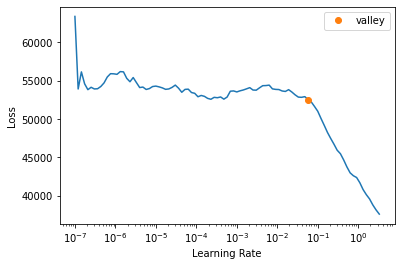

In [22]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(10, 1e-2,wd=0.2)

epoch,train_loss,valid_loss,mae,time
0,5846.481445,2243.951172,39.113739,00:08
1,1033.493286,735.175781,18.112268,00:08
2,996.696594,686.738953,18.129078,00:08
3,984.337402,617.507812,17.384706,00:08
4,929.860535,722.922363,18.623627,00:08
5,753.601440,434.322235,14.329654,00:08
6,657.448425,347.690674,12.469900,00:08
7,580.996582,278.605927,11.557763,00:08
8,522.138611,233.319534,10.128861,00:08
9,445.866913,201.148819,9.876904,00:08


test set

In [24]:
test_dl = learn.dls.test_dl(test_df)
pred = learn.get_preds(dl=test_dl)
pred

(tensor([[341.2073],
         [302.5947],
         [212.9800],
         ...,
         [191.5344],
         [161.1388],
         [226.5964]]), None)

In [26]:
target_preds = pred[0]

test_df['num_sold'] = target_preds

test_df.to_csv(path/'submission.csv', columns=['row_id','num_sold'], index=False)

sub = pd.read_csv(path/'submission.csv')
sub.head()

,row_id,num_sold
0,70128,341.20730
1,70129,302.59473
2,70130,212.98003
3,70131,423.63400
4,70132,123.22638


kaggle JSON uploader


In [27]:
# Next, install the Kaggle API client.
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"5edc75fbf33375a2baf7488f8b05ccc0"}'}

In [36]:
!ls

drive  kaggle.json  models  sample_data  submission.csv


In [35]:
 ! mkdir ~ drive/MyDrive/Rubanza/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
#!kaggle datasets list

mkdir: cannot create directory ‘~drive/MyDrive/Rubanza/.kaggle’: No such file or directory


In [37]:
!kaggle competitions submit -c tabular-playground-series-sep-2022 -f submission.csv -m "Message A"

401 - Unauthorized
